In [1]:
from sklearn.decomposition import FastICA
from matplotlib import pyplot as plt
import numpy as np
import glob
import cv2

In [2]:
#files = glob.glob('*.jpg')
#image_array_list = []
#for file in files:
image_name = 'P10-0001.jpg_kspace_1030-212605.jpg'
#Desktop\Medical_Imaging\GitHub\MedicalImaging\kspace_output\
img = cv2.imread(image_name, 0)
#image_array_list.append(np.array(img))
ica = FastICA(n_components = 65, max_iter=100000, tol=0.01)
ica.fit(img)
image_ica = ica.fit_transform(img)
image_restored = ica.inverse_transform(image_ica)

In [3]:
inverse = np.fft.ifft2(image_restored)
imagefcs = np.zeros((inverse.shape[0], inverse.shape[1]), np.float)
for i in range(inverse.shape[0]):
    for j in range(inverse.shape[1]):
        imagefcs[i, j] = np.log(np.abs(inverse[i, j])*10)

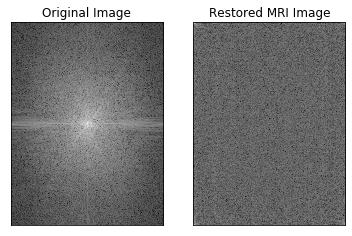

In [4]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(121),plt.imshow(image_restored, cmap = 'gray')
#plt.title('Restored Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imagefcs, cmap = 'gray')
plt.title('Restored MRI Image'), plt.xticks([]), plt.yticks([])
plt.show()